# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


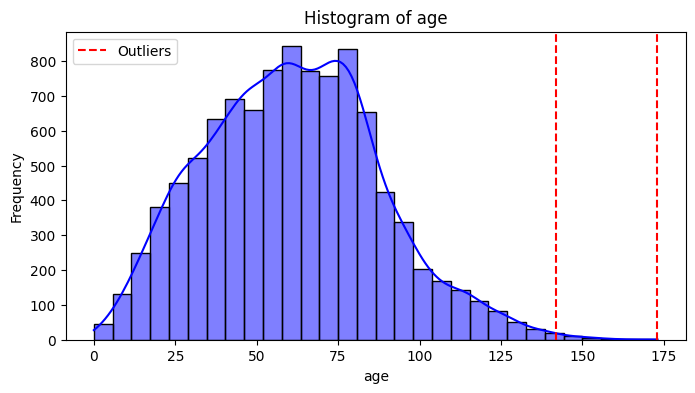

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1541
           1       0.82      0.90      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.86      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.620621, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3523.0, 3465.0]\nclass = 0')


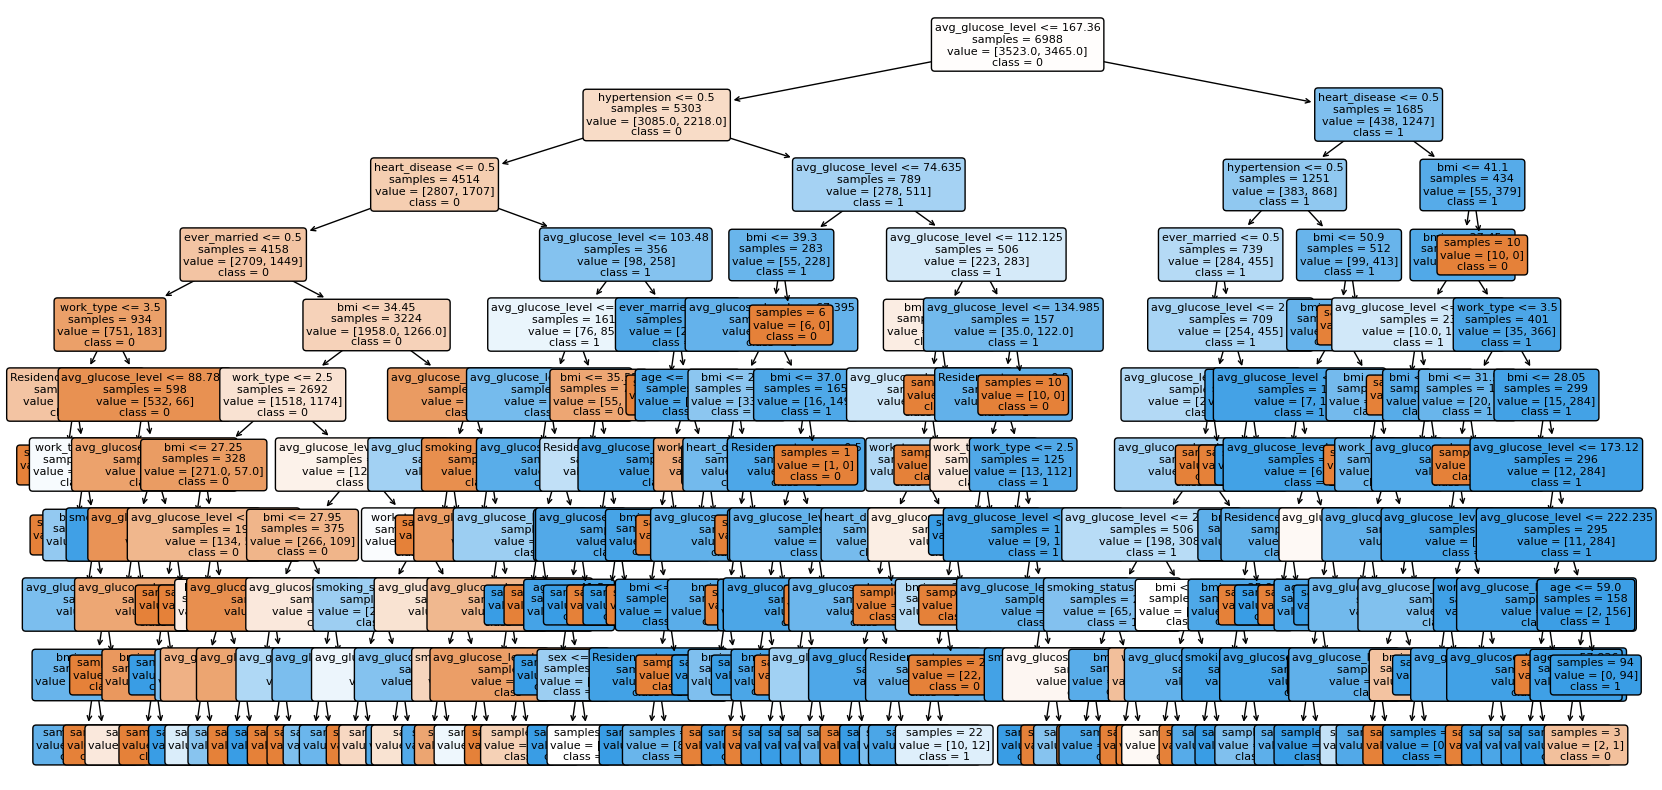

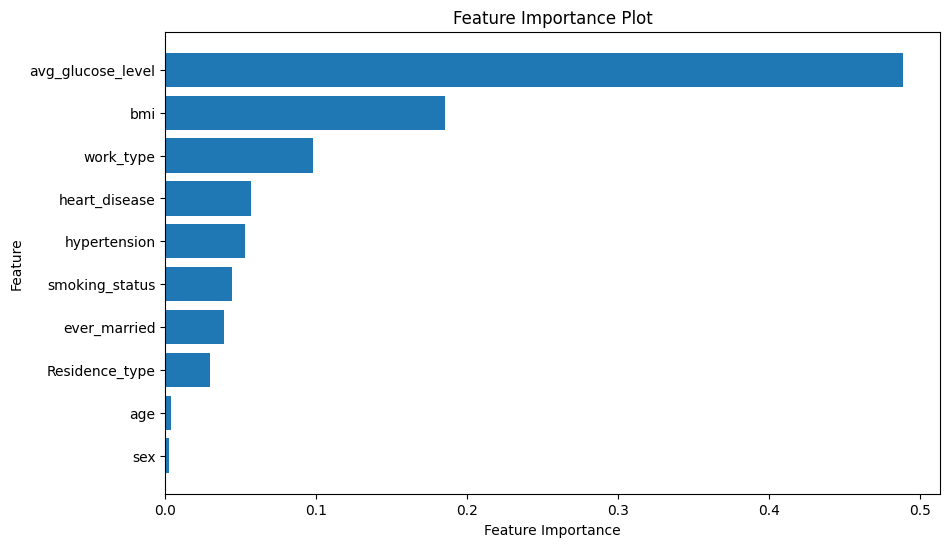

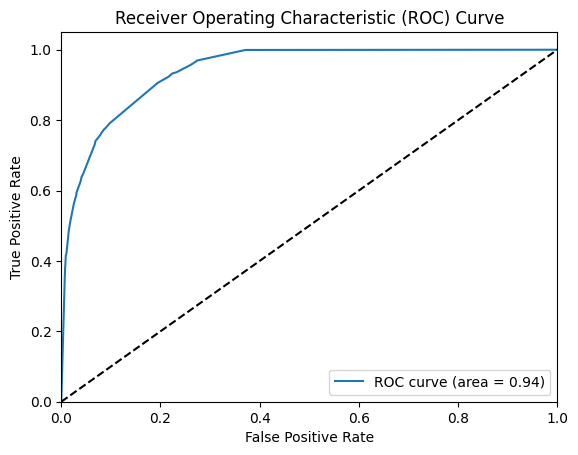

AUC Score: 0.9416675029157218


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.78, 0.81, 0.7666666666666667, 0.7666666666666667, 0.84, 0.8366666666666667, 0.8060200668896321, 0.8260869565217391, 0.8394648829431438, 0.8127090301003345]
Mean accuracy: 0.808428093645485
95% confidence interval: (0.7879265948623178, 0.8289295924286522)


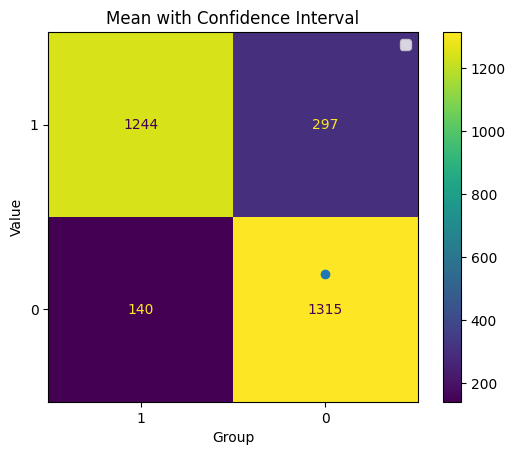

In [6]:
decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



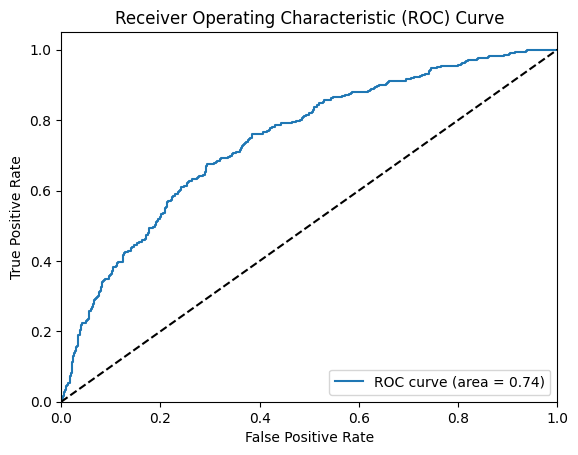

AUC Score: 0.7437483135644056


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6666666666666666, 0.6733333333333333, 0.7166666666666667, 0.6933333333333334, 0.63, 0.65, 0.6421404682274248, 0.6822742474916388, 0.6722408026755853, 0.6387959866220736]
Mean accuracy: 0.6665451505016723
95% confidence interval: (0.6472753024128735, 0.6858149985904711)


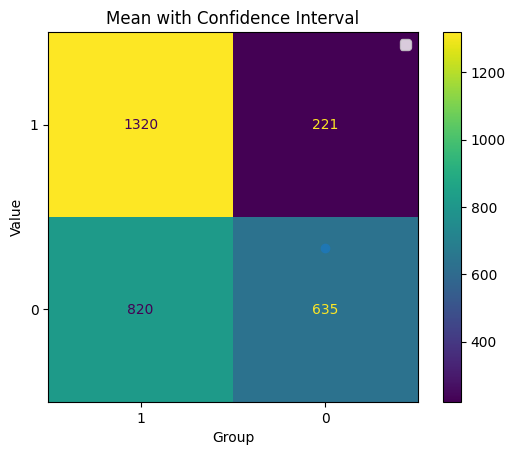

In [7]:
svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


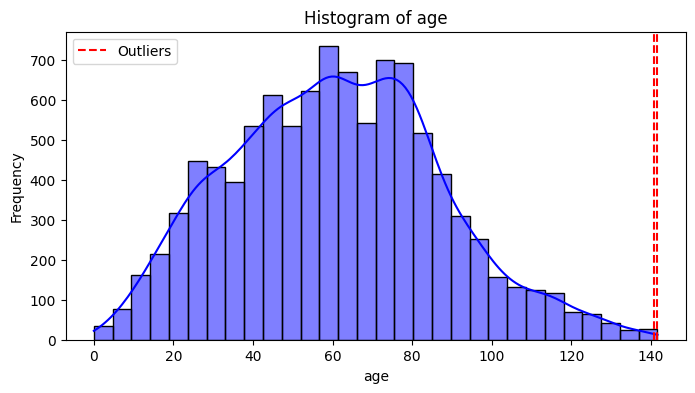

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1541
           1       0.82      0.90      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.86      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.620565, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3523.0, 3465.0]\nclass = 0')


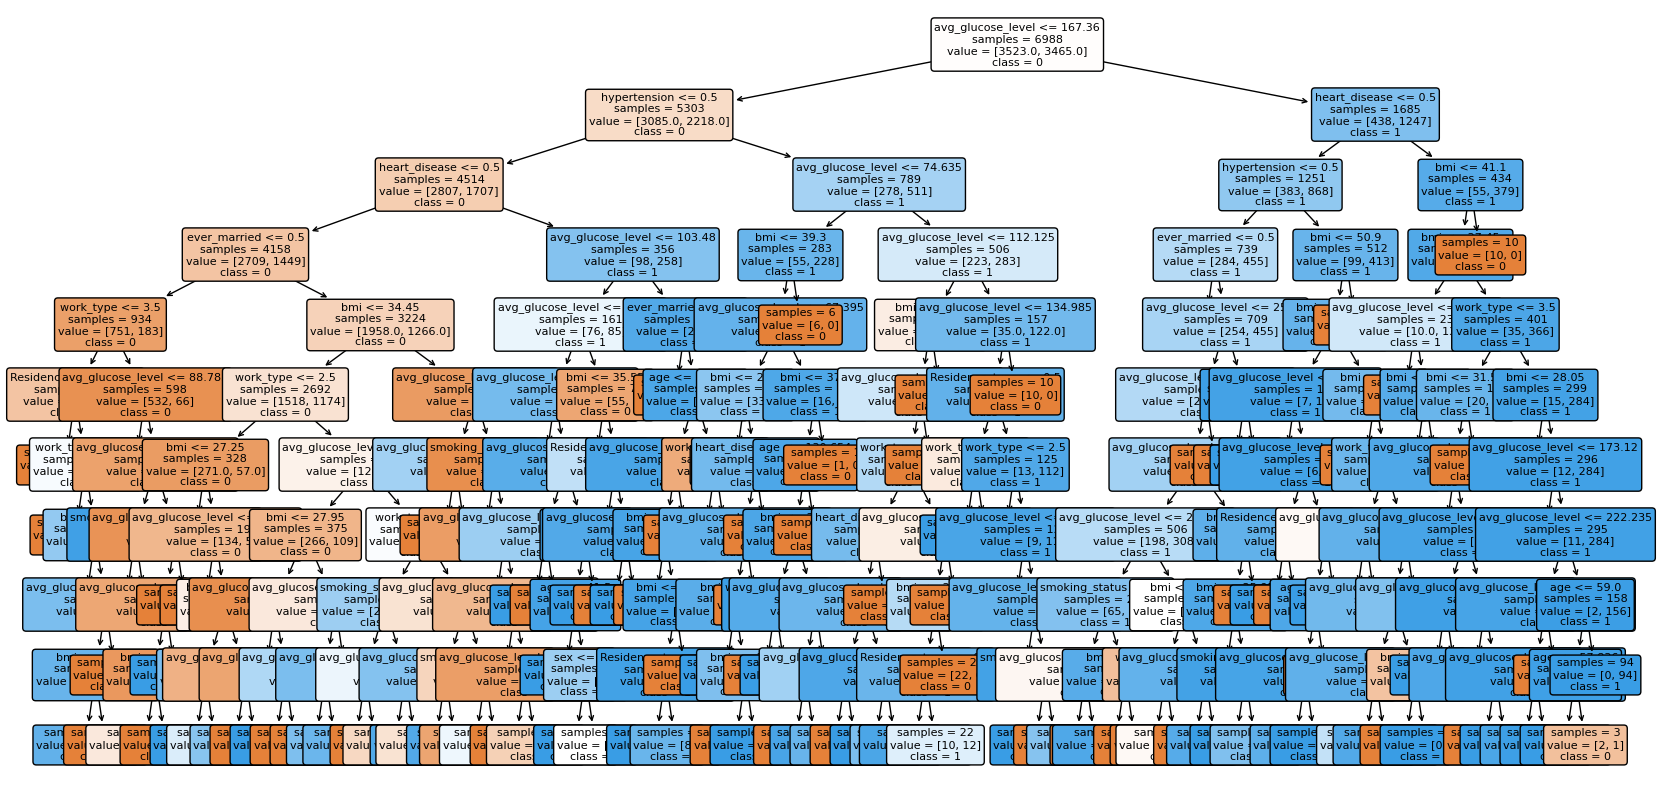

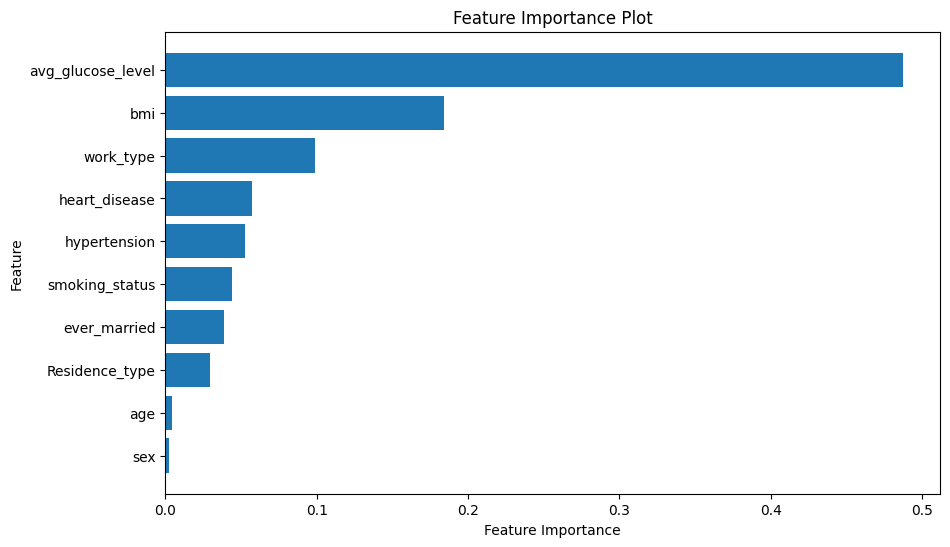

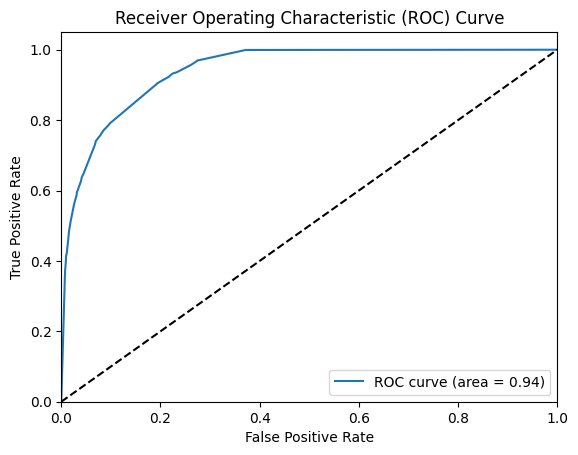

AUC Score: 0.9412319844078576


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8033333333333333, 0.8033333333333333, 0.7833333333333333, 0.76, 0.8133333333333334, 0.8433333333333334, 0.7725752508361204, 0.7892976588628763, 0.8127090301003345, 0.8561872909698997]
Mean accuracy: 0.8037435897435898
95% confidence interval: (0.7824149690333151, 0.8250722104538646)


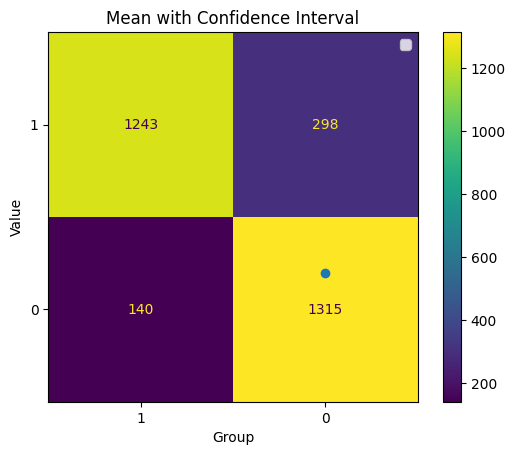

In [10]:
decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



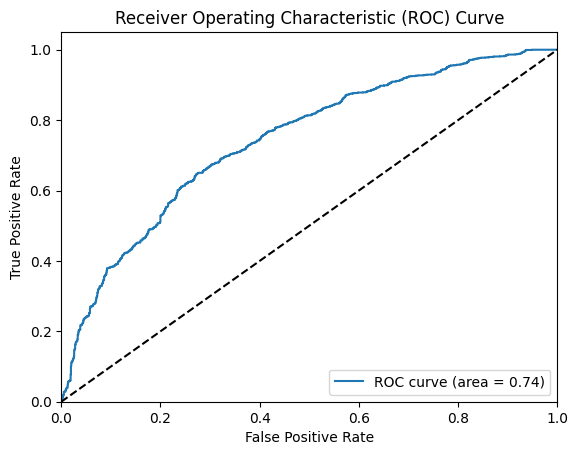

AUC Score: 0.7418238257390769


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7166666666666667, 0.6466666666666666, 0.67, 0.6433333333333333, 0.7066666666666667, 0.66, 0.6755852842809364, 0.6622073578595318, 0.6187290969899666, 0.6321070234113713]
Mean accuracy: 0.6631962095875139
95% confidence interval: (0.6411198967894319, 0.6852725223855959)


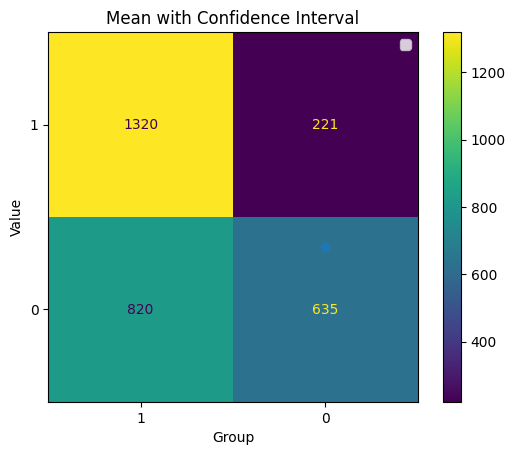

--------------------------------------


In [11]:
svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


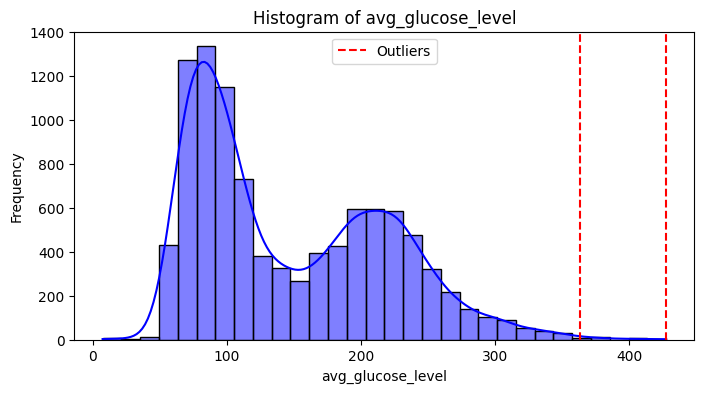

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1541
           1       0.77      0.85      0.81      1455

    accuracy                           0.80      2996
   macro avg       0.81      0.81      0.80      2996
weighted avg       0.81      0.80      0.80      2996

Node Labels:
 Annotation(0.631084, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


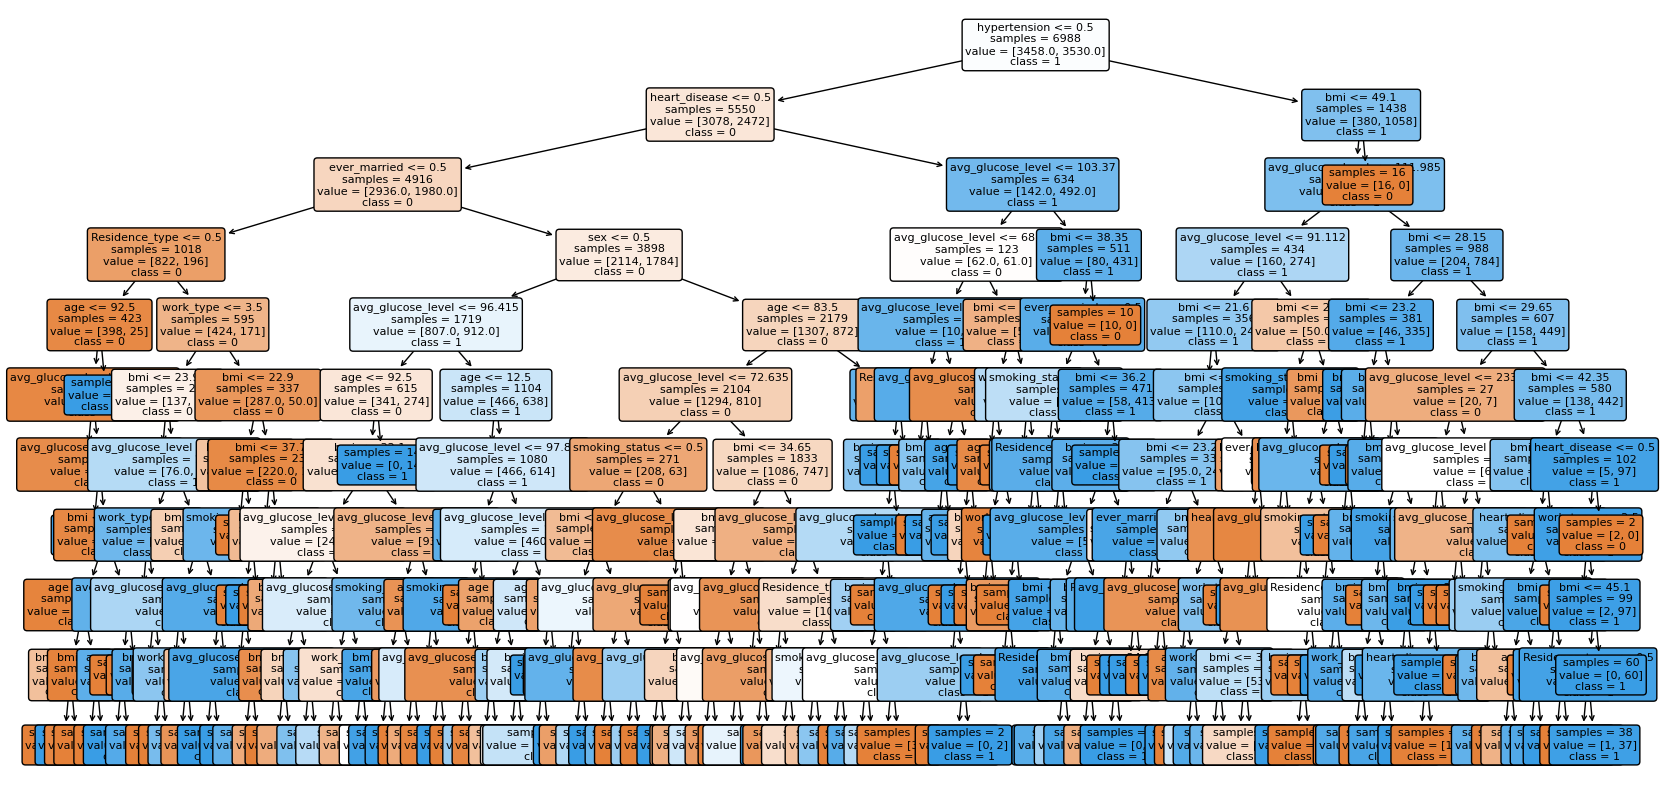

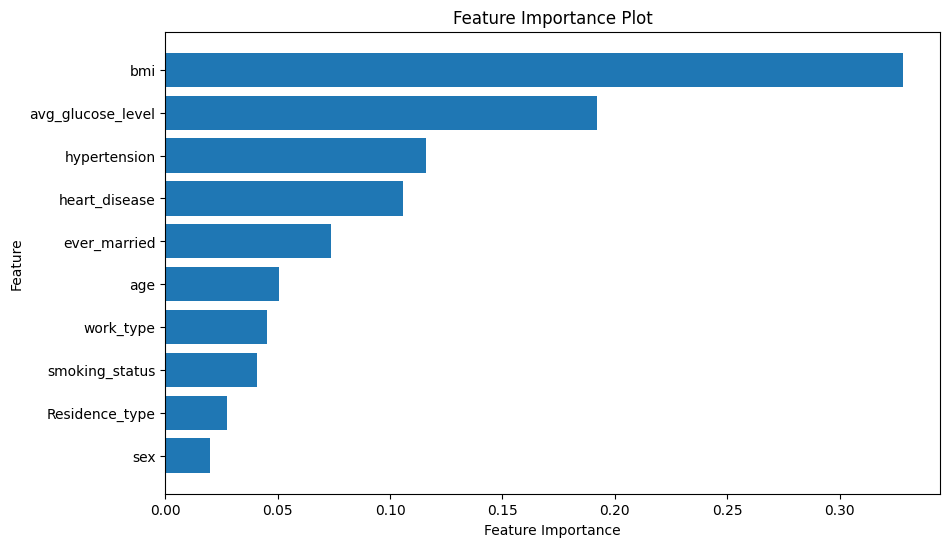

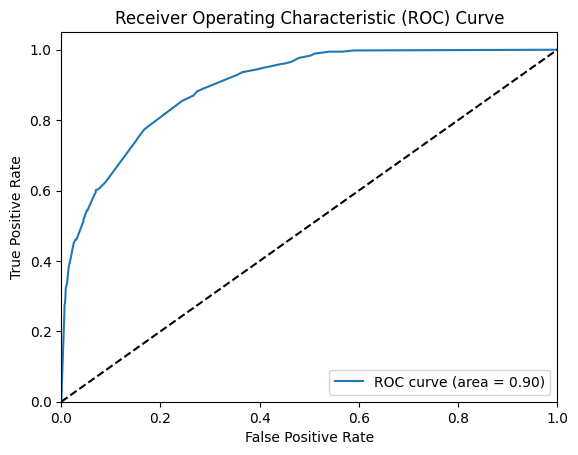

AUC Score: 0.8969607364343679


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.77, 0.8033333333333333, 0.83, 0.81, 0.8233333333333334, 0.8133333333333334, 0.8327759197324415, 0.7859531772575251, 0.8695652173913043, 0.8260869565217391]
Mean accuracy: 0.816438127090301
95% confidence interval: (0.7968870216150837, 0.8359892325655182)


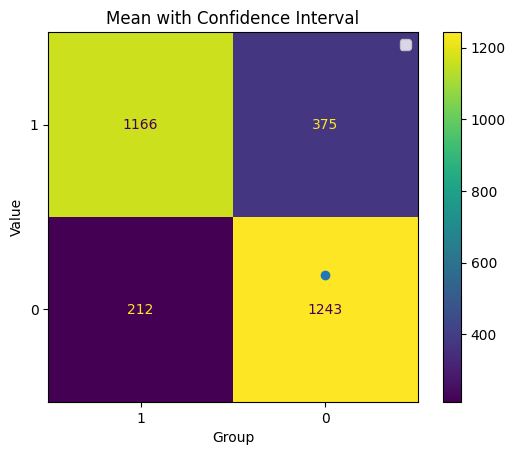

In [16]:
decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



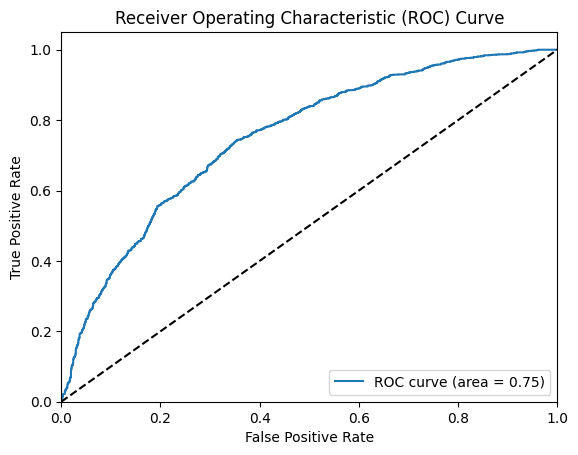

AUC Score: 0.7517593565119272


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.64, 0.6766666666666666, 0.7266666666666667, 0.6833333333333333, 0.6466666666666666, 0.72, 0.6120401337792643, 0.6555183946488294, 0.6655518394648829, 0.6889632107023411]
Mean accuracy: 0.6715406911928652
95% confidence interval: (0.6461900678810919, 0.6968913145046385)


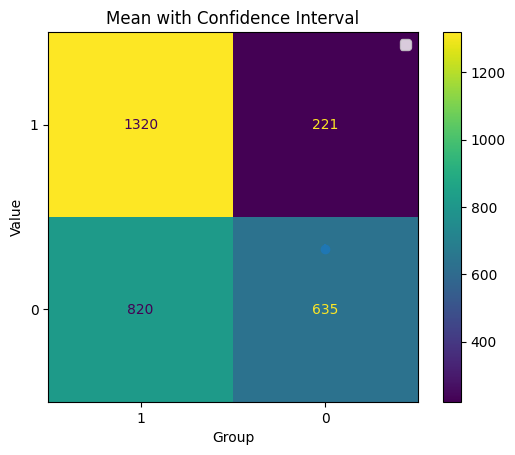

In [17]:
svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


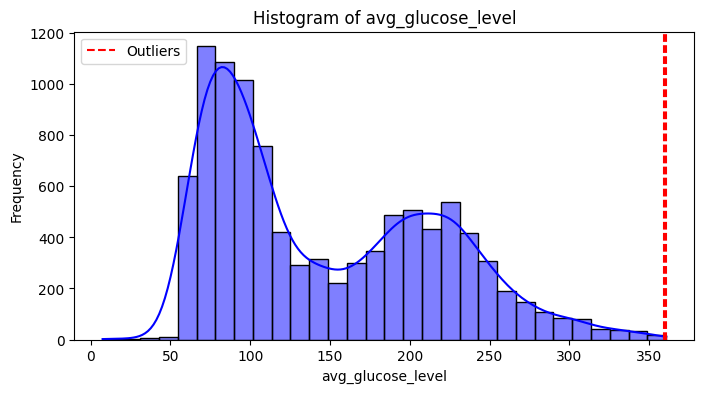

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1541
           1       0.77      0.85      0.81      1455

    accuracy                           0.80      2996
   macro avg       0.81      0.81      0.80      2996
weighted avg       0.81      0.80      0.80      2996

Node Labels:
 Annotation(0.631084, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


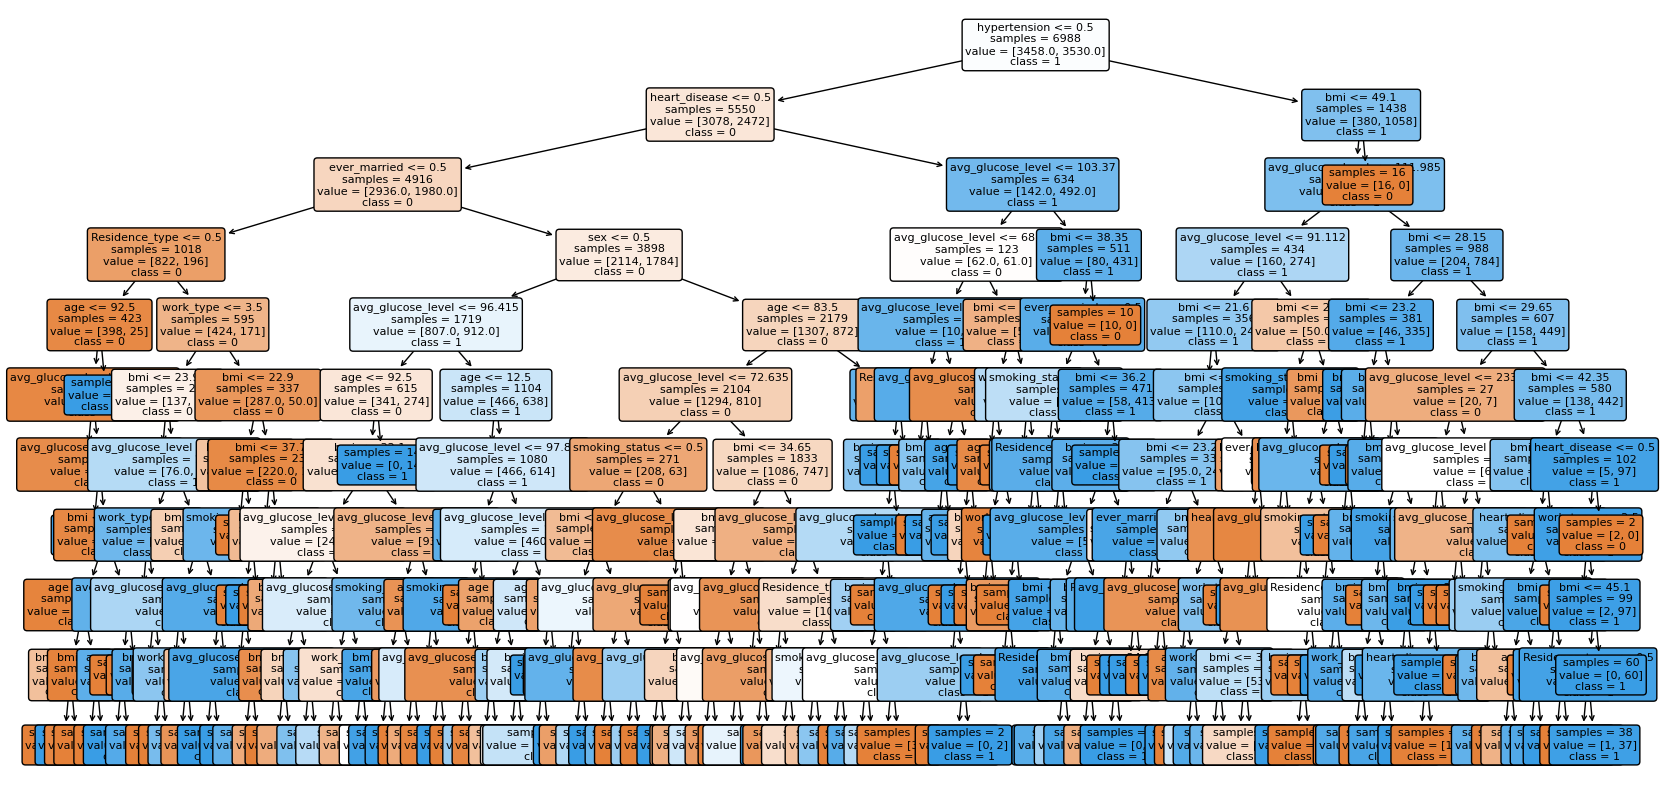

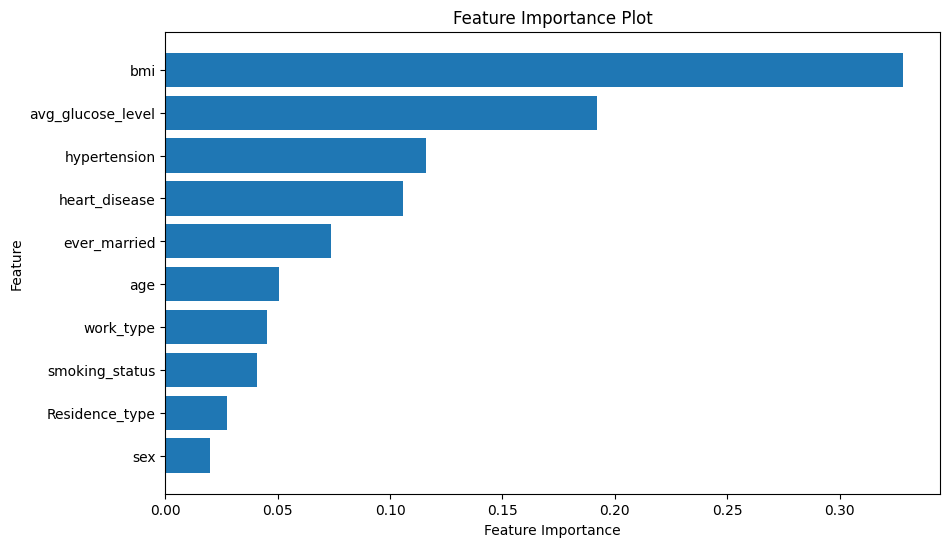

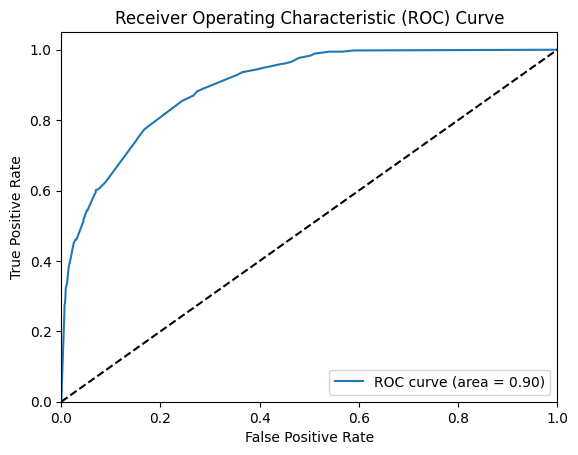

AUC Score: 0.8969607364343679


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.84, 0.84, 0.78, 0.8033333333333333, 0.8166666666666667, 0.7966666666666666, 0.7625418060200669, 0.8294314381270903, 0.7892976588628763, 0.8294314381270903]
Mean accuracy: 0.8087369007803791
95% confidence interval: (0.7896804868860688, 0.8277933146746893)


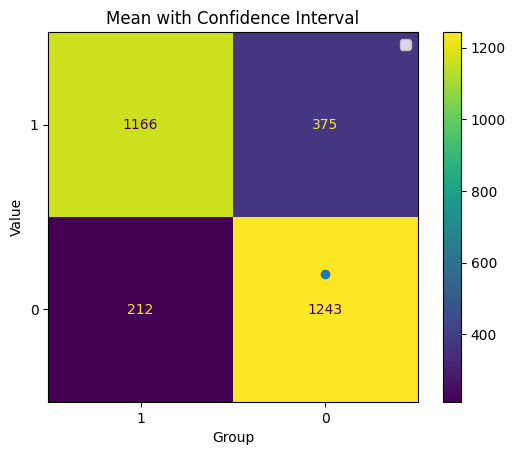

In [20]:
decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



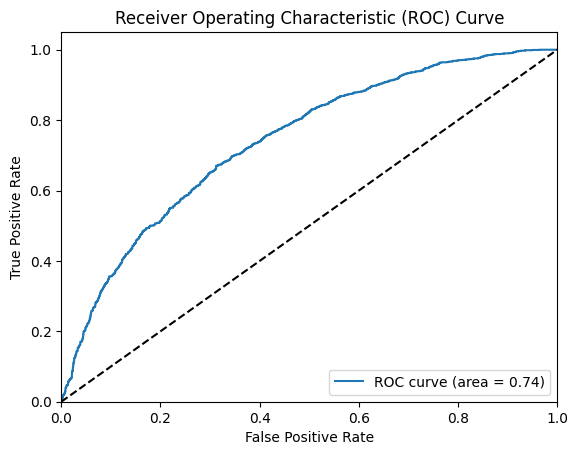

AUC Score: 0.7400621277297958


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.67, 0.6466666666666666, 0.64, 0.6733333333333333, 0.69, 0.6454849498327759, 0.6722408026755853, 0.6722408026755853, 0.6889632107023411]
Mean accuracy: 0.6685596432552955
95% confidence interval: (0.6553191607566622, 0.6818001257539288)


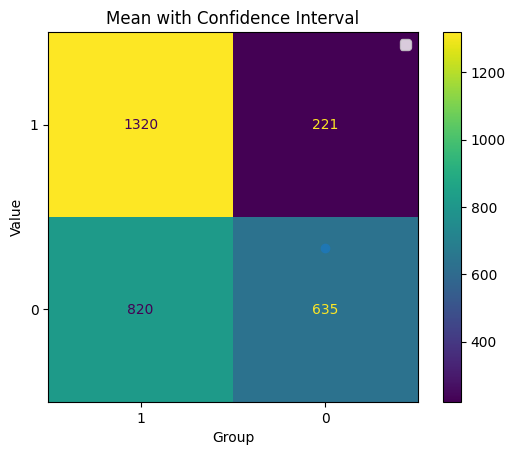

--------------------------------------


In [21]:
svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


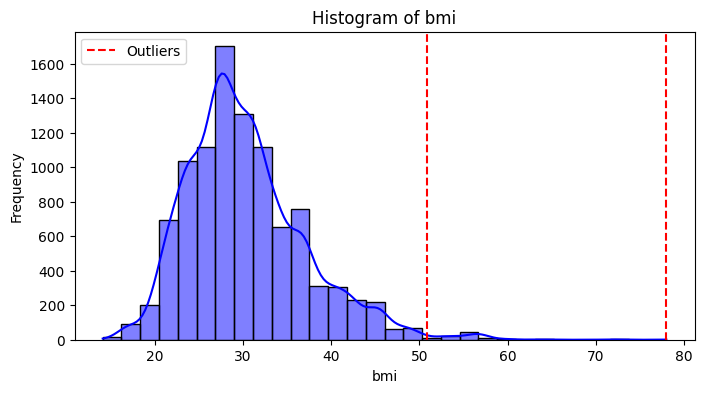

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


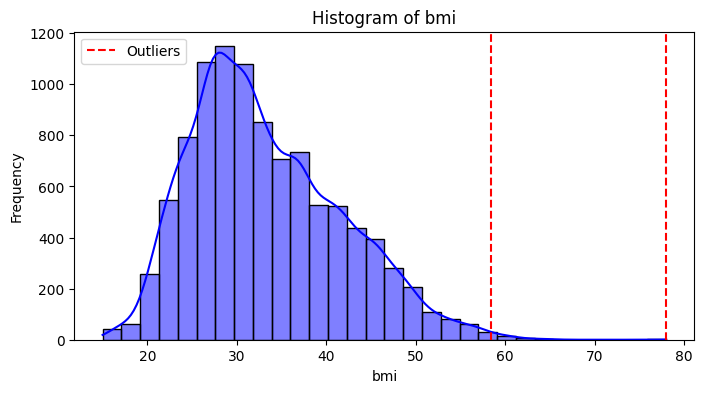

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1541
           1       0.84      0.76      0.80      1455

    accuracy                           0.81      2996
   macro avg       0.82      0.81      0.81      2996
weighted avg       0.81      0.81      0.81      2996

Node Labels:
 Annotation(0.618153, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3470.0, 3518.0]\nclass = 1')


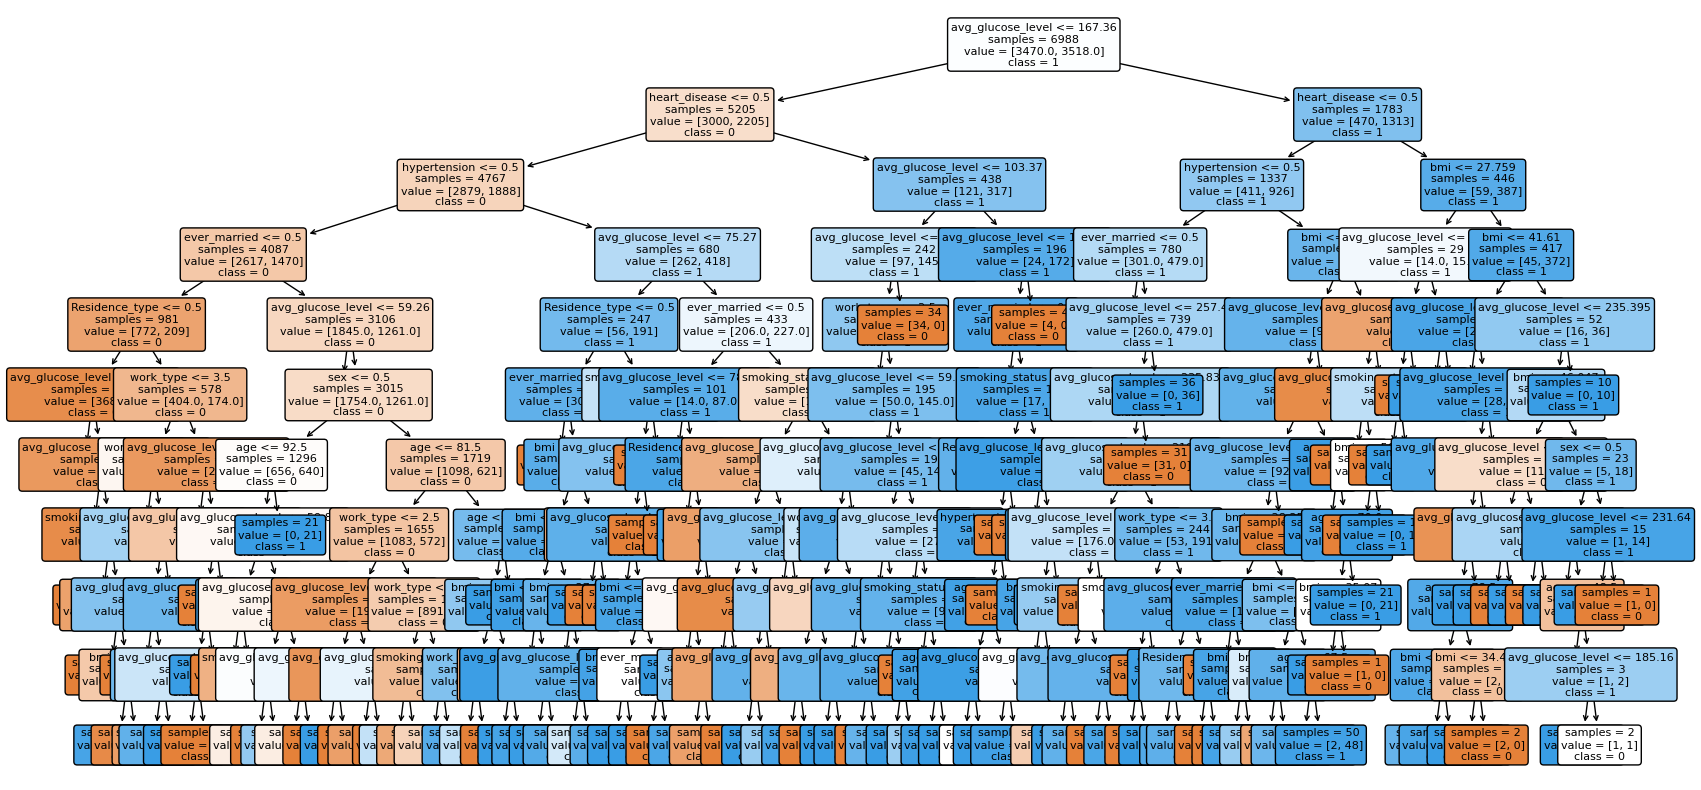

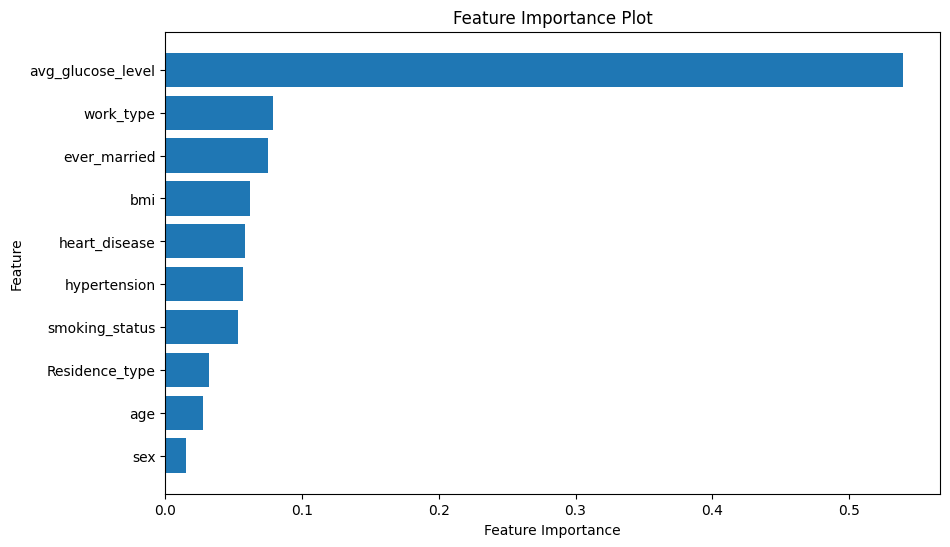

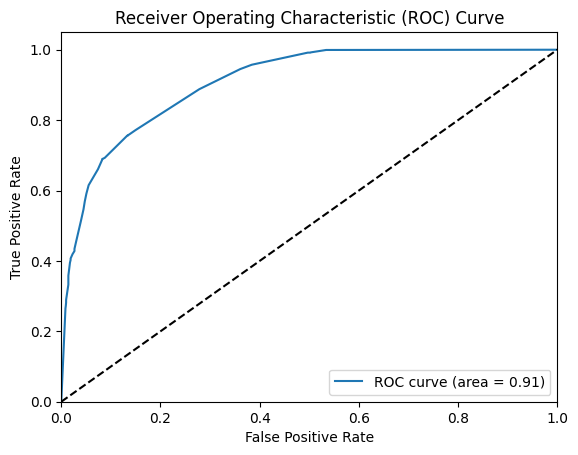

AUC Score: 0.9069294941696716


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8033333333333333, 0.8166666666666667, 0.75, 0.8, 0.85, 0.8166666666666667, 0.802675585284281, 0.7859531772575251, 0.8294314381270903, 0.802675585284281]
Mean accuracy: 0.8057402452619844
95% confidence interval: (0.7867911581092694, 0.8246893324146994)


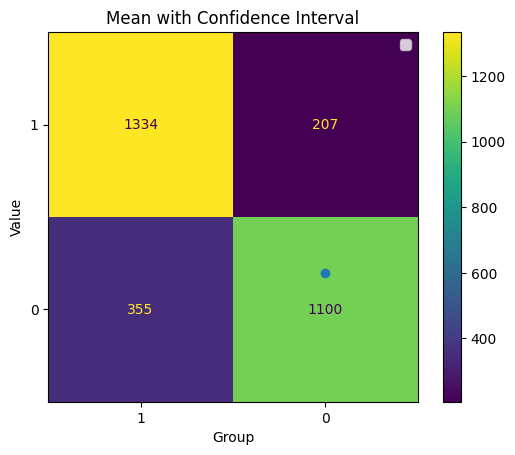

In [26]:
decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector MAchine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1541
           1       0.69      0.60      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.68      0.67      2996



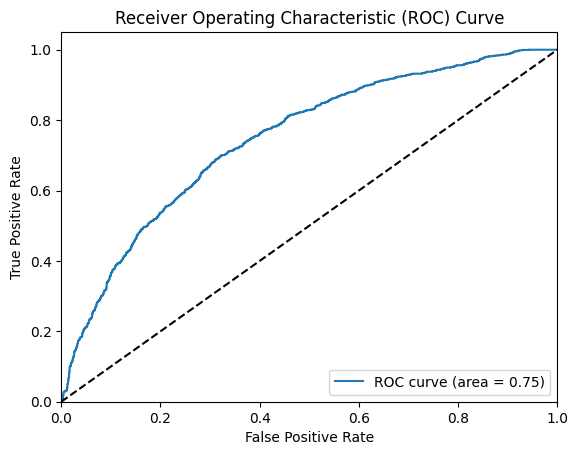

AUC Score: 0.7458859891488323


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.6766666666666666, 0.69, 0.67, 0.6566666666666666, 0.6433333333333333, 0.6387959866220736, 0.6555183946488294, 0.6789297658862876, 0.6488294314381271]
Mean accuracy: 0.6645406911928651
95% confidence interval: (0.6514270901025193, 0.6776542922832108)


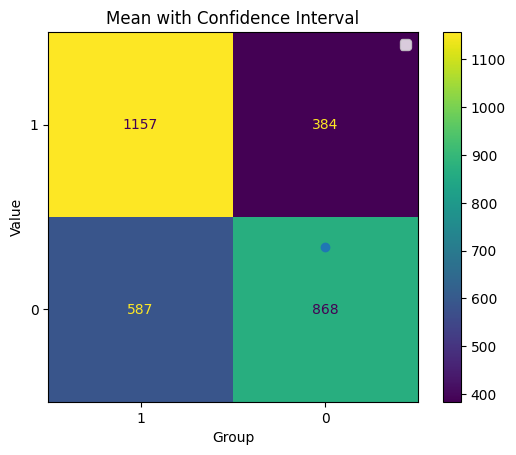

In [27]:
svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


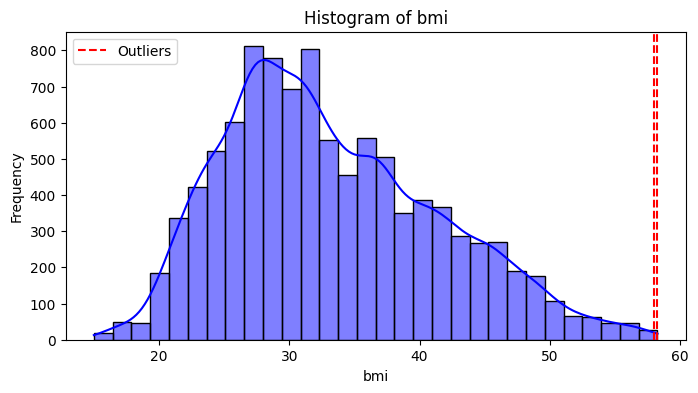

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      1541
           1       0.85      0.74      0.79      1455

    accuracy                           0.81      2996
   macro avg       0.82      0.81      0.81      2996
weighted avg       0.81      0.81      0.81      2996

Node Labels:
 Annotation(0.627219, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3470.0, 3518.0]\nclass = 1')


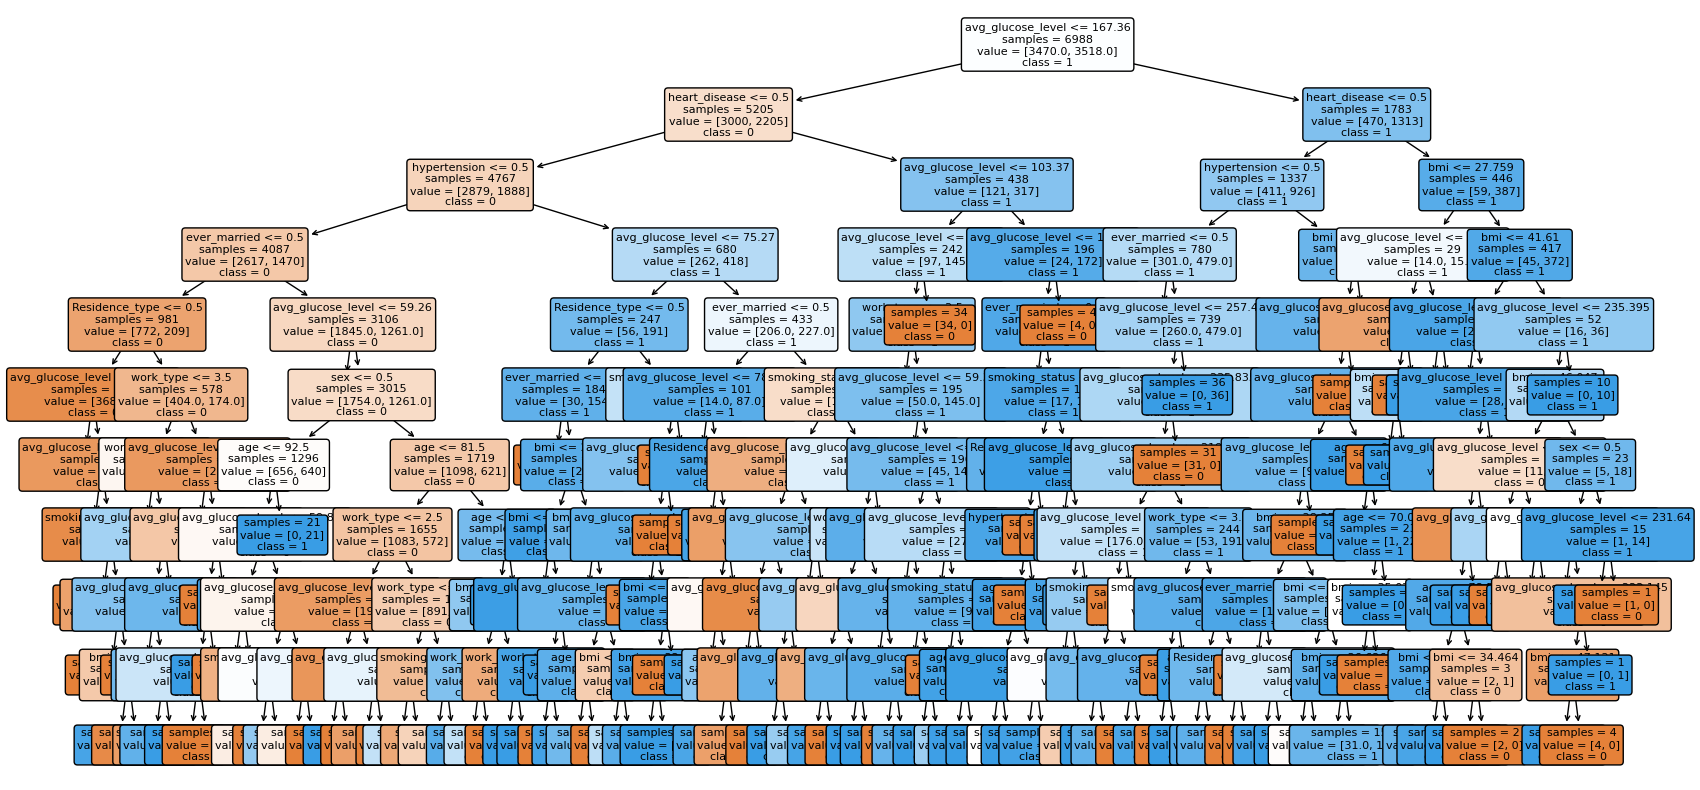

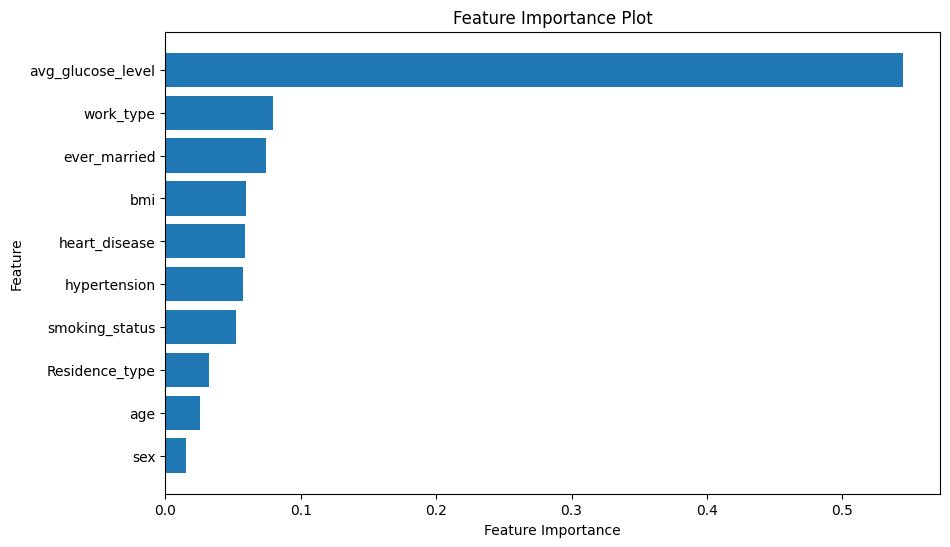

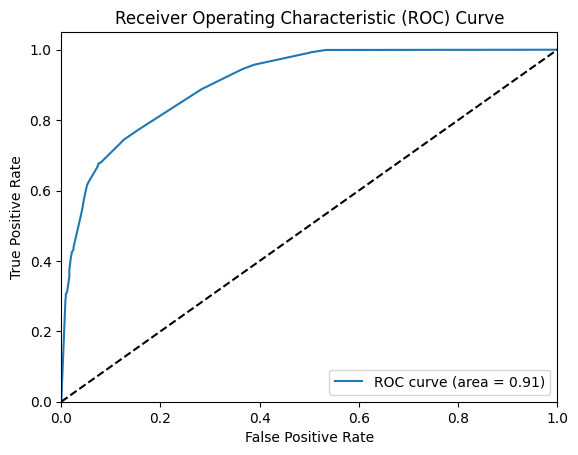

AUC Score: 0.9066003465416084


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7766666666666666, 0.7933333333333333, 0.7933333333333333, 0.8133333333333334, 0.8133333333333334, 0.8266666666666667, 0.745819397993311, 0.7993311036789298, 0.7859531772575251, 0.8260869565217391]
Mean accuracy: 0.7973857302118172
95% confidence interval: (0.779789495614049, 0.8149819648095855)


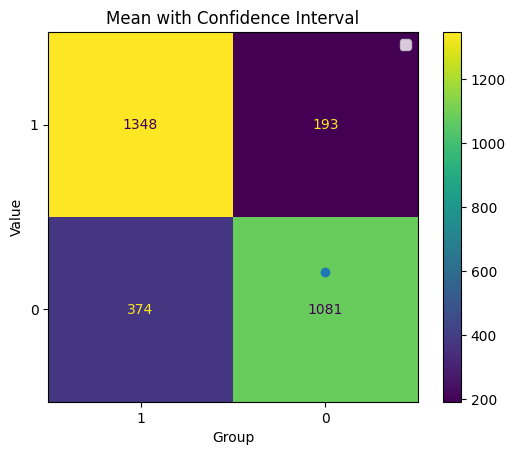

In [30]:
decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1541
           1       0.69      0.60      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.68      0.67      2996



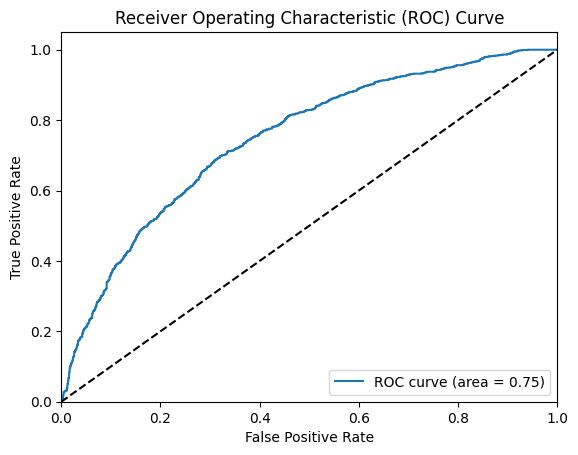

AUC Score: 0.7457932212536599


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.68, 0.68, 0.6233333333333333, 0.68, 0.6166666666666667, 0.6533333333333333, 0.6622073578595318, 0.7190635451505016, 0.6020066889632107, 0.6889632107023411]
Mean accuracy: 0.6605574136008918
95% confidence interval: (0.6342637613954561, 0.6868510658063275)


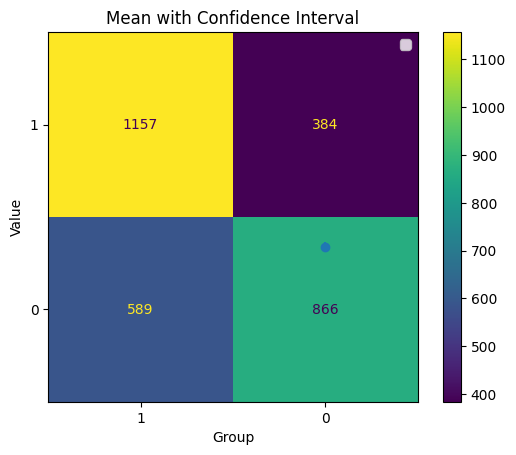

--------------------------------------


In [31]:
svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


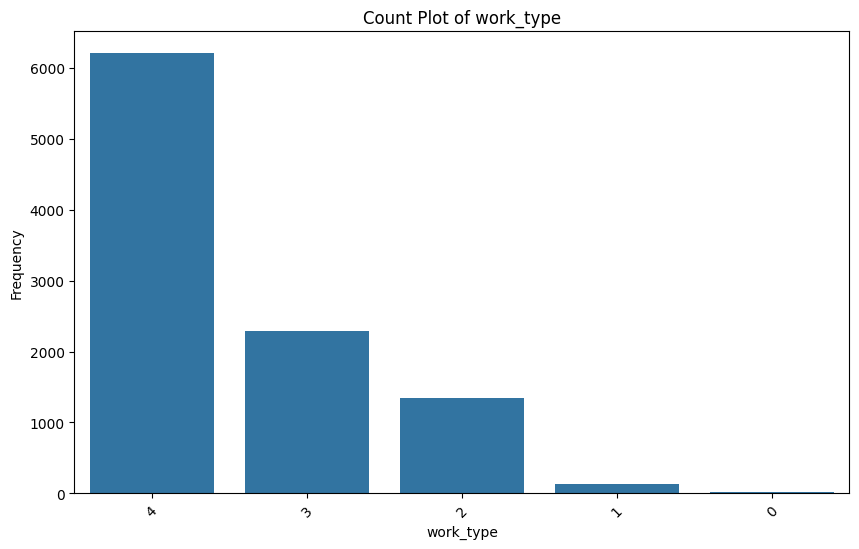

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 30, df)

Valore meno frequente:  0


Value counts:
work_type
4    4359
0    3012
3    1591
2     925
1      97
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


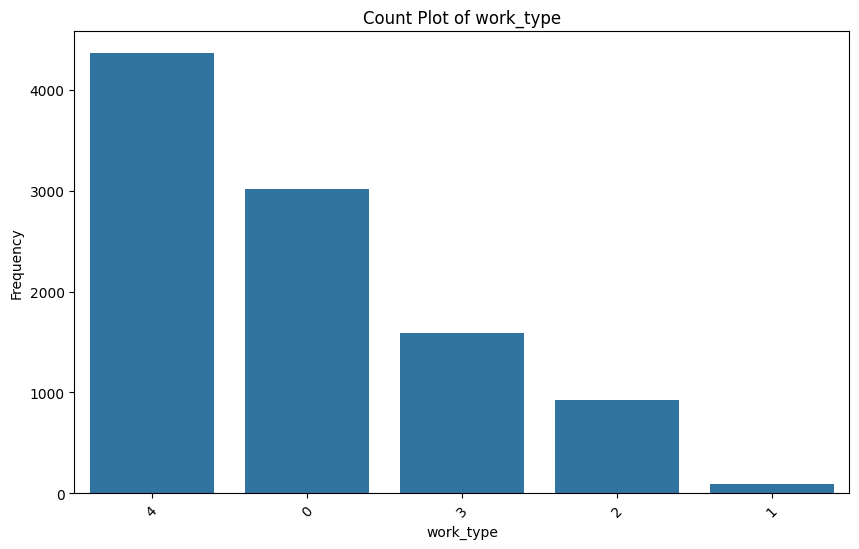

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1541
           1       0.79      0.90      0.84      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.83      2996
weighted avg       0.84      0.84      0.83      2996

Node Labels:
 Annotation(0.626389, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


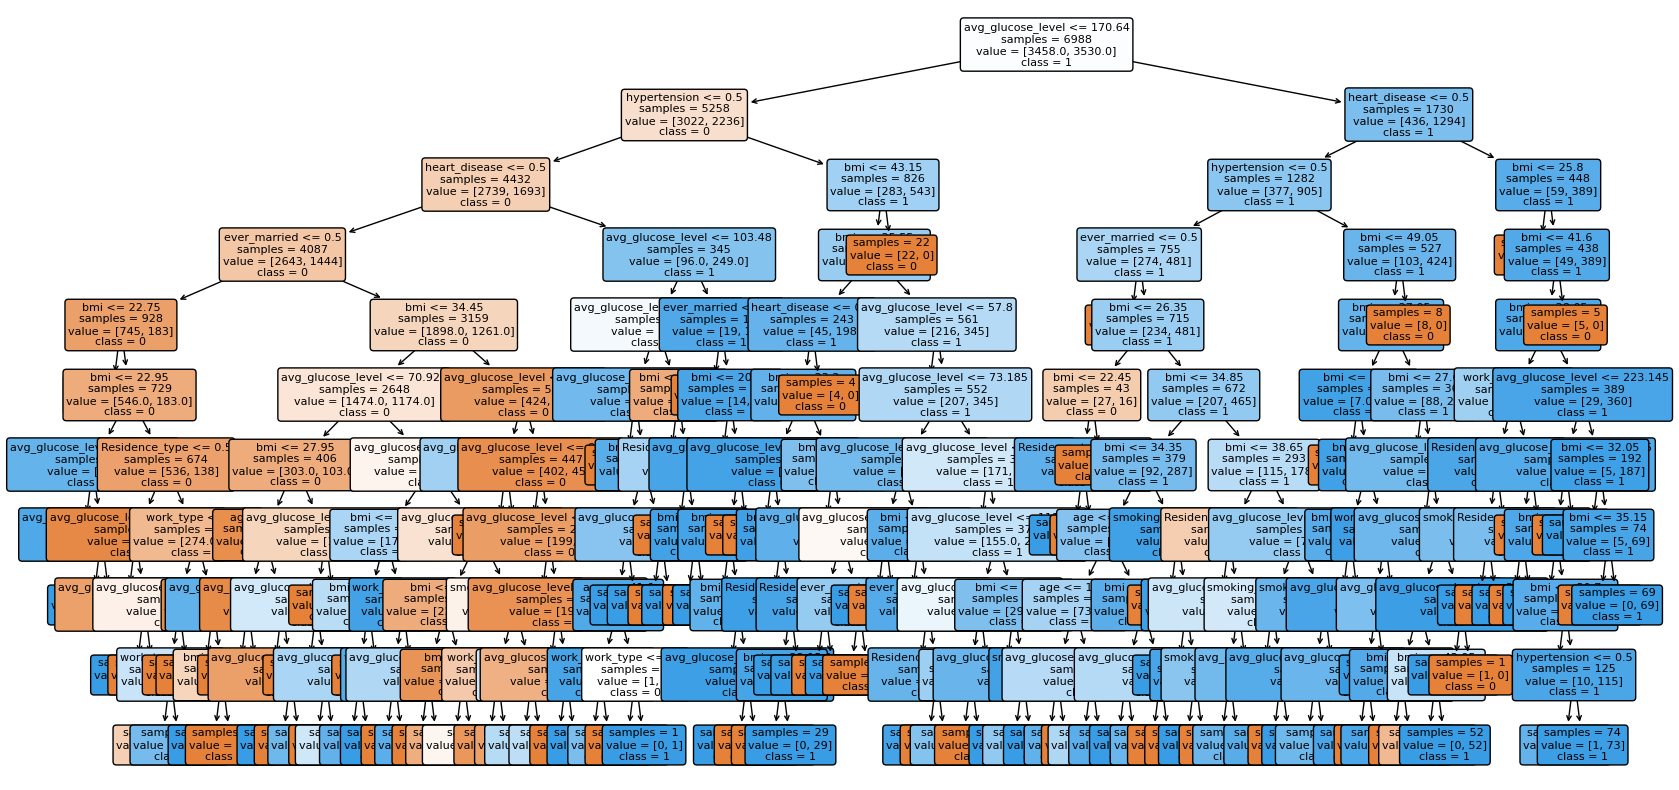

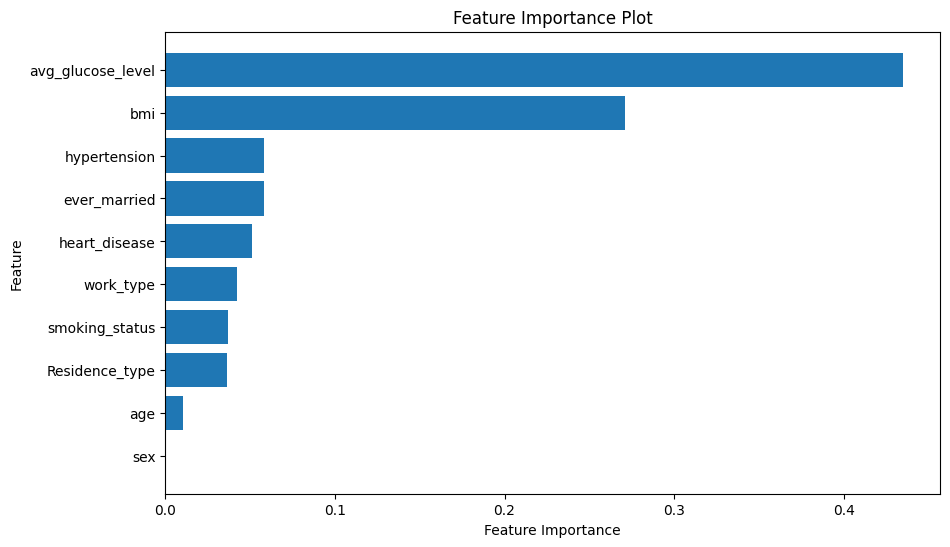

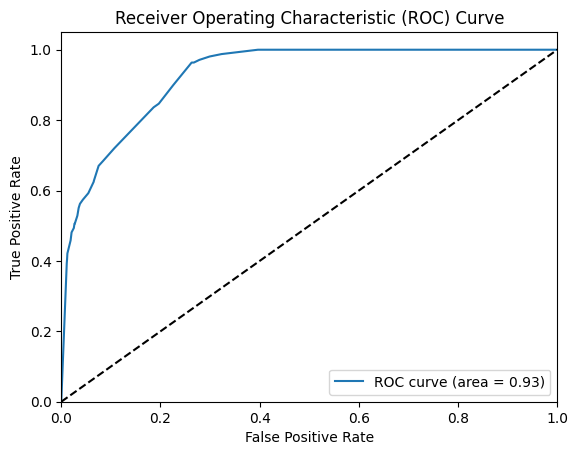

AUC Score: 0.9257091949486098


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8, 0.84, 0.83, 0.81, 0.8366666666666667, 0.8066666666666666, 0.7525083612040134, 0.8060200668896321, 0.8327759197324415, 0.8327759197324415]
Mean accuracy: 0.8147413600891861
95% confidence interval: (0.7958809576557232, 0.833601762522649)


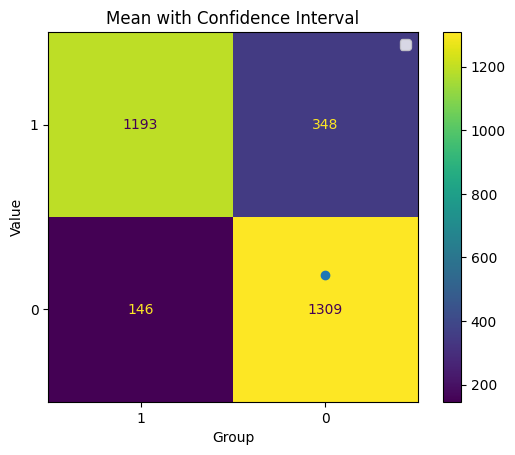

In [36]:
decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1541
           1       0.72      0.58      0.64      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



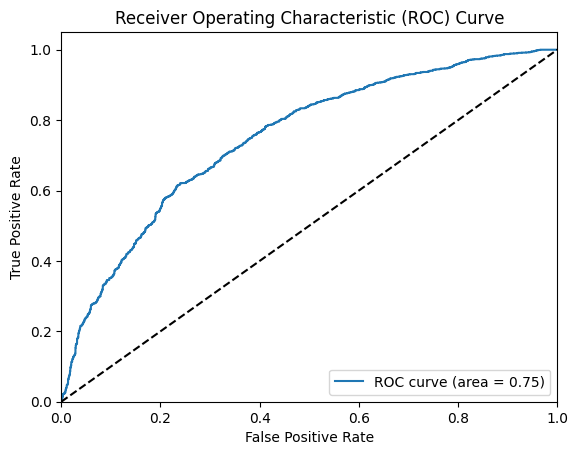

AUC Score: 0.7491698834380316


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7166666666666667, 0.7066666666666667, 0.6733333333333333, 0.7, 0.61, 0.6533333333333333, 0.6789297658862876, 0.6956521739130435, 0.6254180602006689, 0.6722408026755853]
Mean accuracy: 0.6732240802675585
95% confidence interval: (0.6482861308031316, 0.6981620297319855)


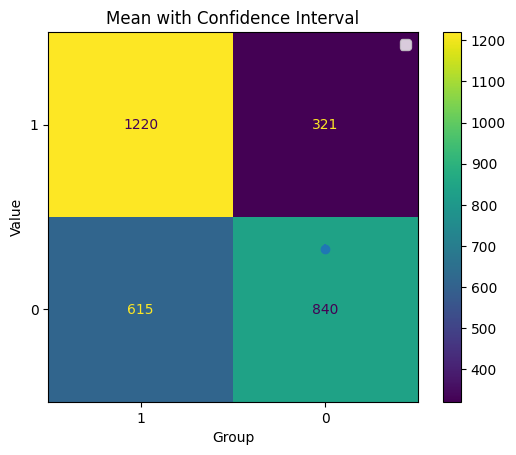

--------------------------------------


In [37]:
svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')